In [1]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'L=10 2D graph state with different sparsity of flipping the basis')

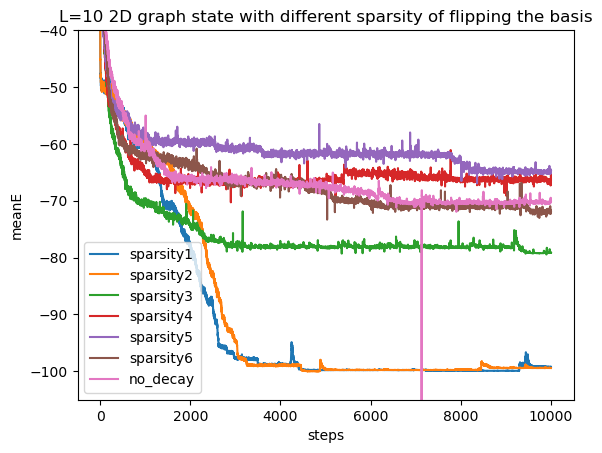

In [25]:
import matplotlib.pyplot as plt
import numpy as np
E1 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_seed3.npy")
E2 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity2_seed3.npy")
E3 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity3_seed3.npy")
E4 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity4_seed3.npy")
E5 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity5_seed3.npy")
E6 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity6_seed3.npy")
En = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity102_seed3.npy")
plt.plot(E1, label="sparsity1")
plt.plot(E2, label="sparsity2")
plt.plot(E3, label="sparsity3")
plt.plot(E4, label="sparsity4")
plt.plot(E5, label="sparsity5")
plt.plot(E6, label="sparsity6")
plt.plot(En, label="no_decay")
plt.legend()
plt.xlabel("steps")
plt.ylabel("meanE")
plt.ylim(-105, -40)
plt.title("L=10 2D graph state with different sparsity of flipping the basis")

In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
meanE_middle = np.load("../patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle1.413716694115407_seed3_patch1.npy")
meanE_angle = np.load("../patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle3.141592653589793_seed3_patch1.npy")
print(meanE_angle.shape)
meanE = np.concatenate((meanE_angle[:2400], meanE_middle, meanE_angle[2400:4800]), axis = 0)
meanE2 = np.load("../patched_rnn_rwkv/result/meanE_L8_rnn.npy")


plt.plot(np.arange(meanE.shape[0]), meanE, label = "rwkv")
plt.plot(np.arange(meanE.shape[0]), meanE2[:, :2400].ravel(), label = "rnn")
for i in (np.arange(11)+1)*2400:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -20)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 1*1")
plt.legend()
plt.show()

(7200,)


In [4]:
meanE_patch = np.load("../patched_rnn_rwkv/result/rwkv_meanE_L4_units4_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3_patch4.npy")
meanE_patched_rnn = np.load("../patched_rnn_rwkv/result/meanE_L4_units32_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3.npy")

indice_1 = np.arange(11)*6000
indice_2 = np.arange(11)*6000+3000
E = []
for i in range(11):
    E.append(meanE_patched_rnn[indice_1[i]:indice_2[i]])
plt.plot(np.array(E).ravel(), label = "patched_gru")
plt.plot(meanE_patch, label = "patched_rwkv")
for i in jnp.arange(11)*3000:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -10)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 2*2")
plt.legend()
plt.show()

In [8]:

E_sr1 = np.load("../patched_rnn_1des/result/meanE_L32_units8_cmi_pattern_no_decayrotationTrueangle1.413716694115407_seed3___.npy")
E_sr2 = np.load("../patched_rnn_1des/result/meanE_L32_units8_cmi_pattern_no_decayrotationTrueangle1.413716694115407_seed3.npy")
backup1, backup2 = E_sr1[5000:10000].copy(), E_sr2[5000:10000].copy()
E_sr1[5000:50000], E_sr2[5000:50000] = E_sr1[10000:55000], E_sr2[10000:55000]
E_sr1[50000:55000], E_sr2[50000:55000] = backup1, backup2
plt.plot(E_sr1, label = "Adam")
plt.plot(E_sr2, label = "Stochastic Reconfiguration")
plt.title("1D_Entanglement_Swapping_tensor_gru L=32")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-32, -16)
x = np.repeat((np.arange(10)+1)*5000, 2).reshape(10, 2)
for i in range(len(x)):
    plt.plot(x[i], [-32, 0], color = 'black', linestyle = 'dashed')
    
plt.legend()


In [16]:
E1 = np.load("../patched_rnn_1des/result/meanE_L64_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E1 = E1.reshape((11, -1))[:, :6000].ravel()
E2 = np.load("../patched_rnn_1des/result/meanE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E4 = np.load("../patched_rnn_1des/result/meanE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
Erwkv = np.load("../patched_rnn_1des/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
plt.plot(np.arange(E1.shape[0]), E1, label = "patch=1", alpha = 0.8)
plt.plot(np.arange(E2.shape[0]), E2, label = "patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "patch=4", alpha = 0.8)
for i in range(11):
    plt.plot([i*6000, i*6000], [-64, -48], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -48)
plt.title("patched_tensor_gru_1d_entanglement_swapping N = 64")
plt.legend()
plt.show()

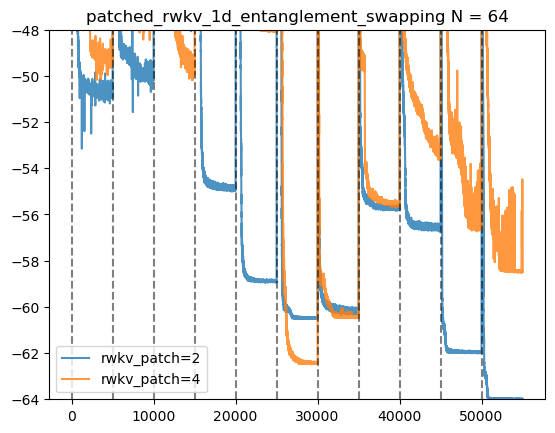

In [20]:
E2 = np.load("../patched_rwkv_1des/result/meanE_L32patch_2_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
E4 = np.load("../patched_rwkv_1des/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
plt.plot(np.arange(E2.shape[0]), E2, label = "rwkv_patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "rwkv_patch=4", alpha = 0.8)
for i in range(11):
    plt.plot([i*5000, i*5000], [-64, -32], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -48)
plt.title("patched_rwkv_1d_entanglement_swapping N = 64")
plt.legend()
plt.show()

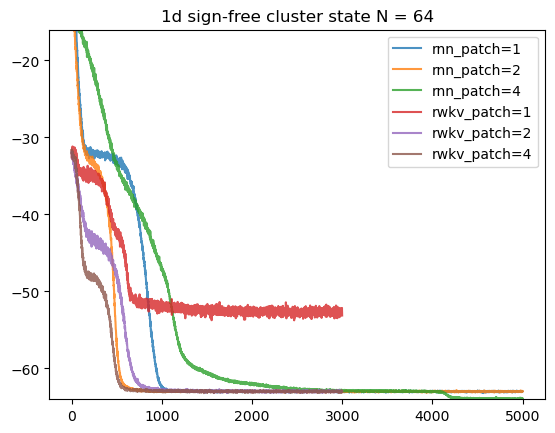

In [21]:
E1 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L64_patch1_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
E2 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
E4 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
Er1 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L64patch_1_emb_size16_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
Er2 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L32patch_2_emb_size4_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
Er4 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
plt.plot(np.arange(E1.shape[0]), E1, label = "rnn_patch=1", alpha = 0.8)
plt.plot(np.arange(E2.shape[0]), E2, label = "rnn_patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "rnn_patch=4", alpha = 0.8)
plt.plot(np.arange(Er1.shape[0]), Er1, label = "rwkv_patch=1", alpha = 0.8)
plt.plot(np.arange(Er2.shape[0]), Er2, label = "rwkv_patch=2", alpha = 0.8)
plt.plot(np.arange(Er4.shape[0]), Er4, label = "rwkv_patch=4", alpha = 0.8)
plt.ylim(-64, -16)

plt.title("1d sign-free cluster state N = 64")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5
6
7
8
9
10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


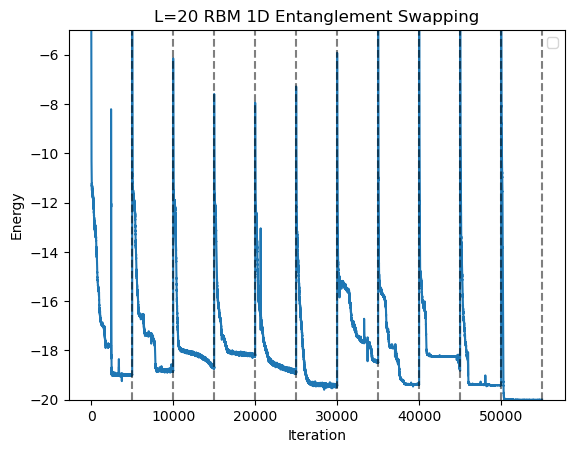

In [30]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("../netket_1des/RBM"+str(i)+"L=20_numsample=4096"+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.legend()
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("L=20 RBM 1D Entanglement Swapping")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-20, -5)
x = np.repeat(np.linspace(5000, 55000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5
6
7
8
9
10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


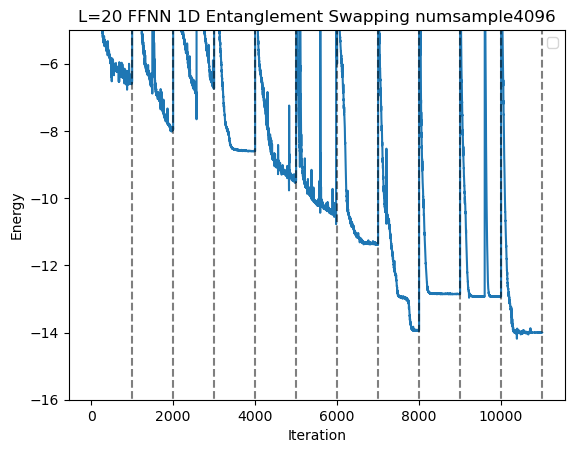

In [32]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("../netket_1des/FFNN/FFNN"+str(i)+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.legend()
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("L=20 FFNN 1D Entanglement Swapping numsample4096")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-16, -5)
x = np.repeat(np.linspace(1000, 11000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


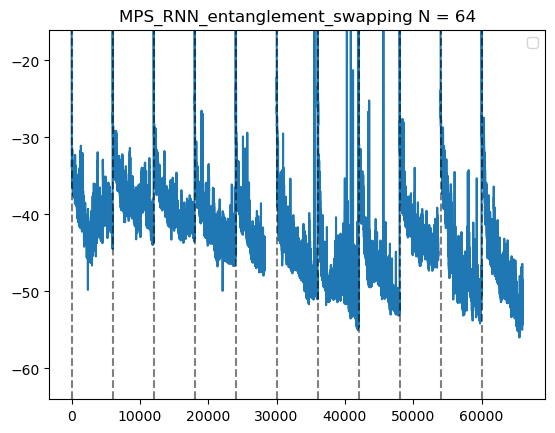

In [33]:
E = np.load("../MPS_RNN/result/meanE_L64_bonddim16_cmi_pattern_no_decayrotationTrueangle1.5707964_seed3.npy")
plt.plot(np.arange(E.shape[0]), E)
plt.title("MPS_RNN_result L=64")
for i in range(11):
    plt.plot([i*6000, i*6000], [-64, -16], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -16)
plt.title("MPS_RNN_entanglement_swapping N = 64")
plt.legend()
plt.show()